In [131]:
import pandas as pd
import matplotlib.pyplot as plt
# Show entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [132]:
# Read Data/Gas Trade Flows - March 2024 - GTF_data.csv into a pandas DataFrame
GTF_data = pd.read_csv('Data/Gas Trade Flows - March 2024 - GTF_data.csv')

# Ensure data in columns Oct-08 to Jan-24 are floats. These are columns 5 and out
GTF_data.iloc[:, 5:] = GTF_data.iloc[:, 5:].apply(pd.to_numeric, errors='coerce')

# Split into import and export data
GTF_data_import = GTF_data.groupby('Entry').sum().reset_index()
GTF_data_import = GTF_data_import.drop(columns=['Borderpoint', 'Exit', 'MAXFLOW (Mm3/h)']) 
GTF_data_export = GTF_data.groupby('Exit').sum().reset_index()
GTF_data_export = GTF_data_export.drop(columns=['Borderpoint', 'Entry', 'MAXFLOW (Mm3/h)'])

# Create a new column 'Total' which is the sum of all the columns from Oct-08 to Jan-24, i.e., columns 2 and out
GTF_data_import['Total'] = GTF_data_import.iloc[:, 2:].sum(axis=1)
GTF_data_export['Total'] = GTF_data_export.iloc[:, 2:].sum(axis=1)

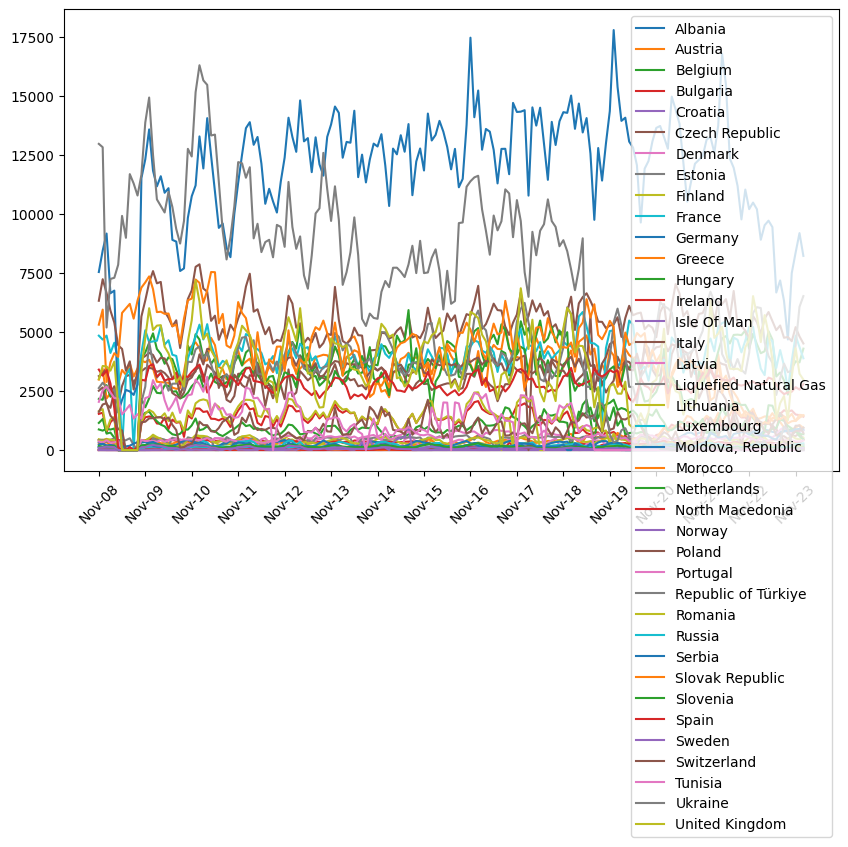

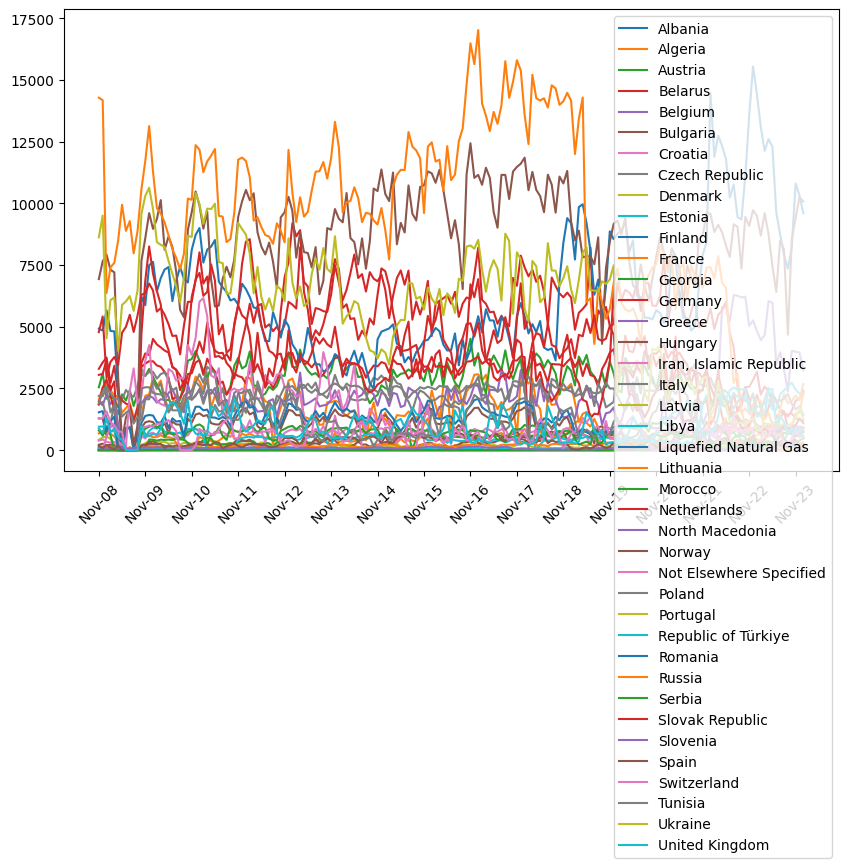

In [133]:
plt.figure(figsize=(10, 6))
for country in GTF_data_import.index:
    plt.plot(GTF_data_import.columns[2:-1], GTF_data_import.iloc[country, 2:-1], label=GTF_data_import.iloc[country, 0])
plt.legend()
plt.xticks(GTF_data_import.columns[2:-1][::12], rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
for country in GTF_data_export.index:
    plt.plot(GTF_data_export.columns[2:-1], GTF_data_export.iloc[country, 2:-1], label=GTF_data_export.iloc[country, 0])
plt.legend()
plt.xticks(GTF_data_export.columns[2:-1][::12], rotation=45)
plt.show()

In [134]:
GTF_data_import_top_10 = GTF_data_import.sort_values(by='Total', ascending=False).head(5)
GTF_data_import_top_10 = GTF_data_import_top_10.reset_index(drop=True)
GTF_data_export_top_10 = GTF_data_export.sort_values(by='Total', ascending=False).head(5)
GTF_data_export_top_10 = GTF_data_export_top_10.reset_index(drop=True)

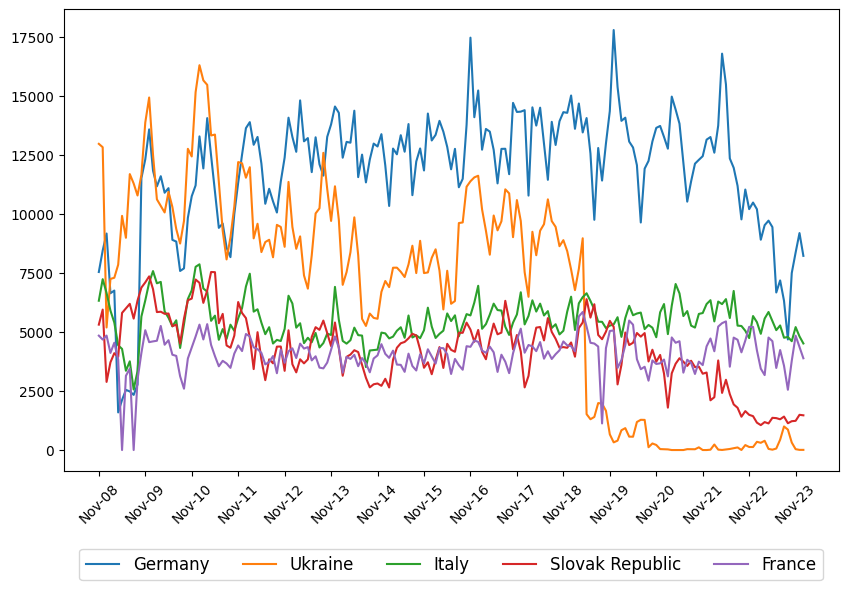

In [135]:
plt.figure(figsize=(10, 6))
for country in GTF_data_import_top_10.index:
    plt.plot(GTF_data_import_top_10.columns[2:-1], GTF_data_import_top_10.iloc[country, 2:-1], label=GTF_data_import_top_10.iloc[country, 0])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
plt.xticks(GTF_data_import_top_10.columns[2:-1][::12], rotation=45)
plt.savefig('figures/Gas_Exports_Top_5.png', bbox_inches='tight')

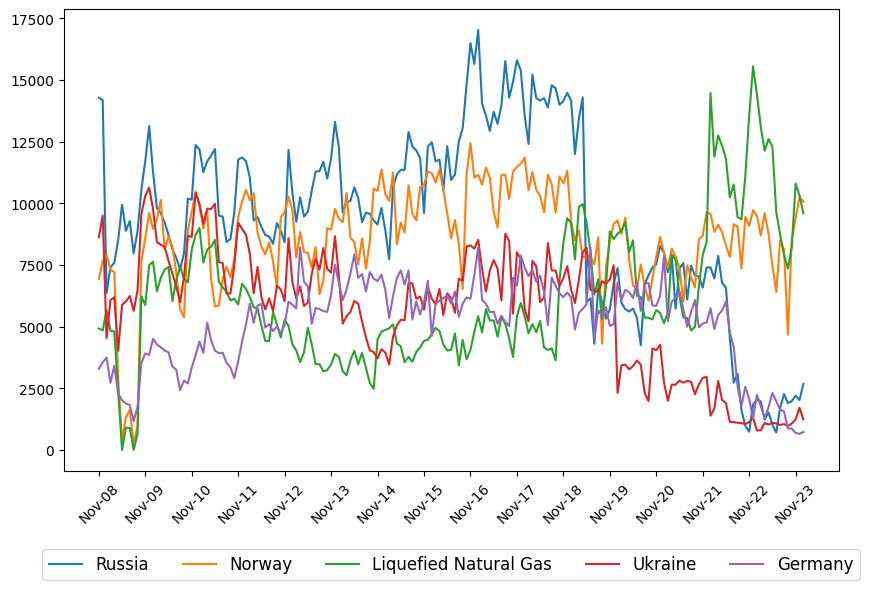

In [136]:
plt.figure(figsize=(10, 6))
for country in GTF_data_export_top_10.index:
    plt.plot(GTF_data_export_top_10.columns[2:-1], GTF_data_export_top_10.iloc[country, 2:-1], label=GTF_data_export_top_10.iloc[country, 0])
plt.xticks(GTF_data_export_top_10.columns[2:-1][::12], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
# Save the legend as well
plt.savefig('figures/Gas_Imports_Top_5.png', bbox_inches='tight')

In [137]:
# Read GEM-data/quarterly_graph_2024 Q1.xlsx into a pandas DataFrame
bruegel_data = pd.read_excel('Data/quarterly_graph_2024 Q1.xlsx')

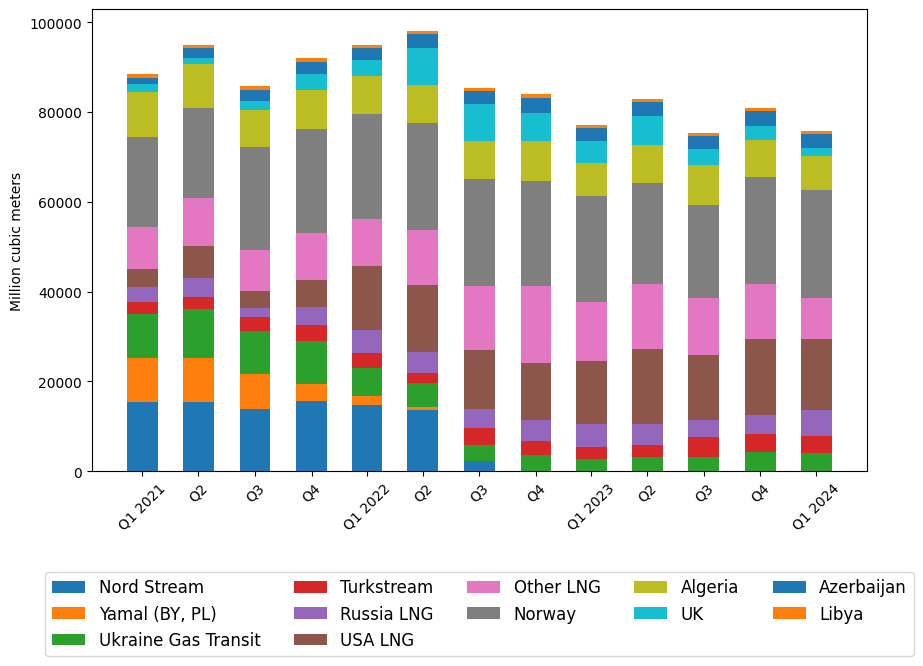

In [138]:
# Plot the bruegel_data. The dates column are quarters, and the rest of the columns are gas exports to the EU
# Plot it as a stacked bar chart, using the column names as labels
plt.figure(figsize=(10, 6))
for i in range(1, len(bruegel_data.columns)):
    plt.bar(bruegel_data['dates'], bruegel_data.iloc[:, i], label=bruegel_data.columns[i], bottom=bruegel_data.iloc[:, 1:i].sum(axis=1), width=50)
plt.xticks(bruegel_data['dates'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=5, fontsize=12)
plt.xticks(bruegel_data['dates'], ['Q1 2021', 'Q2', 'Q3', 'Q4', 'Q1 2022', 'Q2', 'Q3', 'Q4', 'Q1 2023', 'Q2', 'Q3', 'Q4', 'Q1 2024'])
plt.ylabel('Million cubic meters')
plt.savefig('figures/Gas_Exports_to_EU.png', bbox_inches='tight')


In [149]:
# Output the last row of the bruegel_data DataFrame as a dictionary
test = bruegel_data.iloc[1].to_dict()

In [150]:
# Sum the values of the test dictionary
# Drop the dates key
del test['dates']
print(sum(test.values()))

94993.54520147051


In [151]:
# Print each values as a percentage of the total
for key in test:
    print(key, test[key]/sum(test.values())*100)

Nord Stream 16.21654845804532
Yamal (BY, PL) 10.297305254080085
Ukraine Gas Transit 11.479500744349306
Turkstream 2.947937535239178
Russia LNG 4.4060168928951295
USA LNG 7.4039486912088215
Other LNG 11.425655066764815
Norway 20.97732399775612
Algeria 10.36612671617035
UK 1.4763463635450844
Azerbaijan 2.1896067162423964
Libya 0.8136835637033681


In [152]:
# Print the sum of values as a percentage of the total, for keys containing "LNG"
sum_LNG = 0
for key in test:
    if 'LNG' in key:
        sum_LNG += test[key]
print(sum_LNG/sum(test.values())*100)

23.235620650868764


In [139]:
# Read Data/table into a pandas DataFrame
table_data = pd.read_csv('Data/table')
table_data = table_data.transpose()
table_data.columns = table_data.iloc[0]
table_data = table_data.drop(table_data.index[0])
table_data = table_data.reset_index()
table_data = table_data.rename(columns={'index': 'dates'})
table_data['dates'] = pd.to_datetime(table_data['dates'])
table_data = table_data.set_index('dates')
table_data.head()

Type,Consumption,Production
dates,,
1970-01-01,108.54,104.93
1971-01-01,133.66,128.18
1972-01-01,162.71,154.38
1973-01-01,184.92,173.68
1974-01-01,209.44,192.91


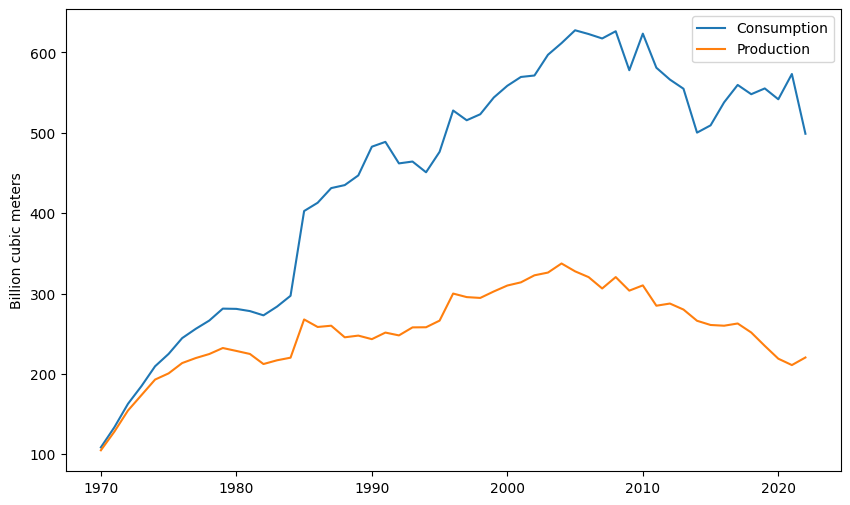

In [140]:
# Plot the table_data. The first column is the date, the second is consumption and third is production
plt.figure(figsize=(10, 6))
plt.plot(table_data.index, table_data['Consumption'], label='Consumption')
plt.plot(table_data.index, table_data['Production'], label='Production')
plt.ylabel('Billion cubic meters')
plt.legend()
plt.savefig('figures/EU_Consumption_vs_Production.png', bbox_inches='tight')
plt.show()